# Data Science Project

In [14]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset loaded from UCI repository

In [2]:
#initialize variable with url
address="https://archive.ics.uci.edu/ml/machine-learning-databases/00505/qsar_aquatic_toxicity.csv"


# Reading the dataset

In [3]:
#read_csv() function of pandas to read the dataset
data = pd.read_csv(address)

The head() returns the first n rows for the object based on position. By default, n=5

In [4]:
data.head(5)

,0;0;0;2.419;1.225;0.667;0;0;3.740
0,0;0;0;2.638;1.401;0.632;0;0;4.330
1,9.23;11;0;5.799;2.93;0.486;0;0;7.019
2,9.23;11;0;5.453;2.887;0.495;0;0;6.723
3,9.23;11;0;4.068;2.758;0.695;0;0;5.979
4,215.34;327.629;3;0.189;4.677;1.333;0;4;6.064


Since here the separator is ';' and not ',' it needs to be specified when loading dataset, column names are added

In [7]:
#list of column names
col_names = ["TPSA(Tot)","SAacc","H-050", "ML0GP", "RDCHI", "GATS1p", "nN", "C-040", "Target-LC50"]

In [8]:
data = pd.read_csv(address, names=col_names, sep=";")
data.head()

,TPSA(Tot),SAacc,H-050,ML0GP,RDCHI,GATS1p,nN,C-040,Target-LC50
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


Now, the dataset is in the proper format

In [9]:
#storing the dataset
data.to_csv("Dataset.csv")

In [10]:
#read data
data = pd.read_csv("Dataset.csv", index_col=0)
data.head()

,TPSA(Tot),SAacc,H-050,ML0GP,RDCHI,GATS1p,nN,C-040,Target-LC50
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


# Initial Analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 545
Data columns (total 9 columns):
TPSA(Tot)      546 non-null float64
SAacc          546 non-null float64
H-050          546 non-null int64
ML0GP          546 non-null float64
RDCHI          546 non-null float64
GATS1p         546 non-null float64
nN             546 non-null int64
C-040          546 non-null int64
Target-LC50    546 non-null float64
dtypes: float64(6), int64(3)
memory usage: 42.7 KB


It is observed that there are no missing values present in this dataset.

In [12]:
data.describe()

,TPSA(Tot),SAacc,H-050,ML0GP,RDCHI,GATS1p,nN,C-040,Target-LC50
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


Individual range in columns vary alot, scaling is necessary

# Visualising the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D99BD89708>]],
      dtype=object)

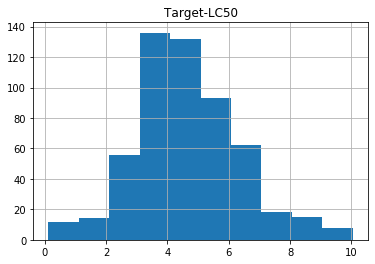

In [15]:
data.hist('Target-LC50')

The plot seems to be symmetrical about the peak of the histogram, but to be certain, a kdeplot is drawn.
A kdeplot depicts the probability density at different values in a continuous variable.

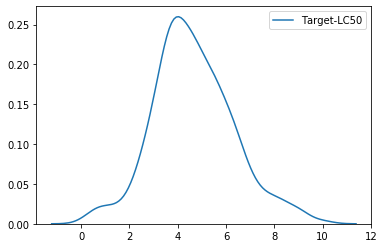

In [16]:
sns.kdeplot(data['Target-LC50'])

From this figure, the distribution of the target variable is considered normal.

# Correlation

Correlation is a measure of the strength of the linear relationship between two variables. Its value lie between -1 to 1, where a value of 1 represents a perfect positive linear relationship, a value of -1 represents a perfect negative linear relationship and a value of 0 represents the scenario that the two variables share no relationship at all.

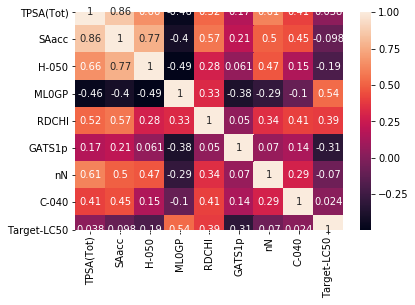

In [18]:
sns.heatmap(data.corr(), annot=True)

It seems that the target variable shares a moderately positive relationship with the features or the predictors 'MLOGP' and 'RDCHI'. It also shares a moderate negative relationship with 'GATS1p' variable.

The other correlation values are close to 0 and hence, not of much use.

Individual scatterplots are made to further analyse the relationships between the variables.

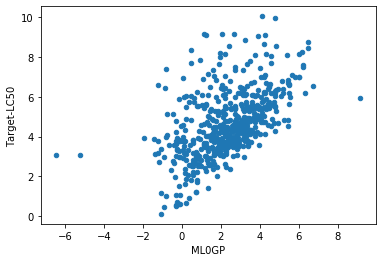

In [19]:
data.plot(kind='scatter',x='ML0GP',y='Target-LC50')

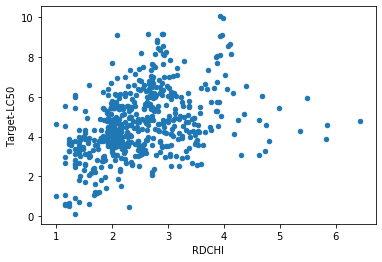

In [20]:
data.plot(kind='scatter', x='RDCHI', y='Target-LC50')

In this case, since the correlation value is less than that in the case of the feature 'ML0GP', the data points seem to be more scattered.

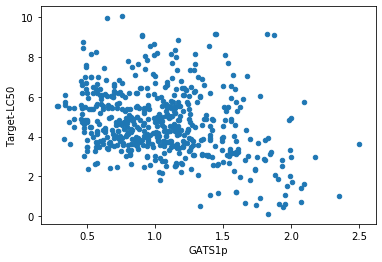

In [21]:
data.plot(kind='scatter',x='GATS1p', y='Target-LC50')

In this figure, it is observed that as the value of x increases, the value of y decreases, which results in the negative sign of the correlation value.

In [22]:
#import libraries


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
#read data
data = pd.read_csv("Dataset.csv", index_col=0)
data.head()

,TPSA(Tot),SAacc,H-050,ML0GP,RDCHI,GATS1p,nN,C-040,Target-LC50
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


In [24]:
y = data['Target-LC50'].copy()
y.head()

0    3.740
1    4.330
2    7.019
3    6.723
4    5.979
Name: Target-LC50, dtype: float64

In [26]:
x = data.drop('Target-LC50', axis=1)
x.head()

,TPSA(Tot),SAacc,H-050,ML0GP,RDCHI,GATS1p,nN,C-040
0,0.00,0.0,0,2.419,1.225,0.667,0,0
1,0.00,0.0,0,2.638,1.401,0.632,0,0
2,9.23,11.0,0,5.799,2.930,0.486,0,0
3,9.23,11.0,0,5.453,2.887,0.495,0,0
4,9.23,11.0,0,4.068,2.758,0.695,0,0


# Scaling

In [27]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Splitting the dataset

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [29]:
len(x_train)

382

In [30]:
len(x_test)

164

In [31]:
type(x_train)

numpy.ndarray

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
#initialise the model
model = LinearRegression()

In [34]:
#fit the model
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#the coefficients of the linear model
model.coef_

array([ 1.22721573, -0.89359272, -0.05567643,  0.71482679,  0.39650452,
       -0.28094505, -0.28686163, -0.05698255])

In [36]:
#predictions
pred = model.predict(x_test)

In [37]:
residuals = y_test - pred

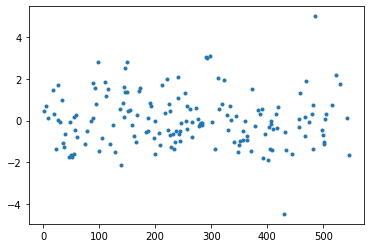

In [41]:
import matplotlib.pyplot as plt

plt.plot(residuals, ls="", marker=".")
plt.show()


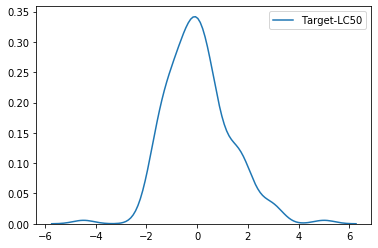

In [42]:
import seaborn as sns

sns.kdeplot(residuals)

In [43]:
#accuracy score

model.score(x_test, y_test)

0.48750542363932536